## 15. Threshold Models

**Exercise 15.1**. Fit a TAR model for the predator series with delay set to 2, and interpret the findings by making use of the framework studied in Stenseth et al. (1998, 1999). (You may first want to check whether or not their framework is approximately valid for the TAR model.) Also, compare the fitted model with the TAR(2;1,4) model with delay 3 reported in the text. (The data file is named `veilleux`.)

**Solution**.

Let's fit the data series for the predator numbers (without its starting points) to a TAR model with $d = 2$ and with $d = 3$, using the same methodology as in the text.

In [1]:
require(ggplot2)
require(data.table)
require(TSA)

Loading required package: ggplot2

Loading required package: data.table

Loading required package: TSA


Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [2]:
# Load and select the predator data series
Y <- fread('../data/veilleux.dat')[['Didinium']]

# Filter out quasiperiodic start
Y <- Y[15:length(Y)]

In [3]:
model.d2 = tar(y=log(Y), p1=4, p2=4, d=2, a=.1, b=.9, print=T)

time series included in this analysis is:  log(Y) 
SETAR(2, 1 , 4 ) model delay = 2 
estimated threshold =  4.048  from a Minimum AIC  fit with thresholds 
searched from the  17  percentile to the   81  percentile of all data.
The estimated threshold is the  26.4  percentile of
all data.
lower regime: 
Residual Standard Error=0.2445
R-Square=0.997
F-statistic (df=2, 12)=2023.065
p-value=0

                 Estimate Std.Err t-value Pr(>|t|)
intercept-log(Y)   0.9526  0.7856  1.2125   0.2487
lag1-log(Y)        0.8230  0.2016  4.0817   0.0015




 (unbiased) RMS 
0.05979 
 with no of data falling in the regime being 
log(Y) 14 


 (max. likelihood) RMS for each series (denominator=sample size in the regime) 
log(Y) 0.05125 


 upper regime: 
Residual Standard Error=0.2526
R-Square=0.9976
F-statistic (df=5, 34)=2830.15
p-value=0

                 Estimate Std.Err t-value Pr(>|t|)
intercept-log(Y)   4.0579  0.5716  7.0990   0.0000
lag1-log(Y)        0.9122  0.1432  6.3692   0.0000
lag2-log(

In [4]:
model.d3 = tar(y=log(Y), p1=4, p2=4, d=3, a=.1, b=.9, print=T)

time series included in this analysis is:  log(Y) 
SETAR(2, 1 , 4 ) model delay = 3 
estimated threshold =  4.661  from a Minimum AIC  fit with thresholds 
searched from the  17  percentile to the   81  percentile of all data.
The estimated threshold is the  56.6  percentile of
all data.
lower regime: 
Residual Standard Error=0.2341
R-Square=0.9978
F-statistic (df=2, 28)=6355.76
p-value=0

                 Estimate Std.Err t-value Pr(>|t|)
intercept-log(Y)   0.2621  0.3156  0.8305   0.4133
lag1-log(Y)        1.0175  0.0704 14.4455   0.0000




 (unbiased) RMS 
0.05479 
 with no of data falling in the regime being 
log(Y) 30 


 (max. likelihood) RMS for each series (denominator=sample size in the regime) 
log(Y) 0.05114 


 upper regime: 
Residual Standard Error=0.2676
R-Square=0.9971
F-statistic (df=5, 18)=1253.556
p-value=0

                 Estimate Std.Err t-value Pr(>|t|)
intercept-log(Y)   4.1986  1.2841  3.2697   0.0043
lag1-log(Y)        0.7081  0.2023  3.5005   0.0026
lag2-log

The model estimated with delay $d = 2$ is selected as SETAR(2, 4, 3), and the threshold splits 26.4% of the data, while the model estimated with delay $d = 3$ is selected as SETAR(2, 1, 1), and the threshold splits 56.65% of the data; this means that the model with delay 3 is more balanced (with a split closer to 50%).

Additionally, the estimated noise variances are generally smaller on the model with delay $d = 3$, and its AIC is also smaller. 

Finally, looking at the skeletons, the cycle doesn't quite converge within tolerances with default values for delay $d = 2$, though it appears to have a cycle of length 10.  Convergence within cycle 10 is achieved, and the skeleton looks almost piecewise linear.


 no limit cycle 
 
 tail part of the skeleton: 
  [1] 3.87 4.14 4.36 4.94 5.37 5.48 5.29 4.81 4.26 3.90 3.86 4.13 4.35 4.94 5.38
[16] 5.49 5.30 4.81 4.26 3.89 3.85 4.12 4.34 4.94 5.39 5.51 5.31 4.82 4.26 3.88
[31] 3.83 4.11 4.33 4.94 5.40 5.52 5.32 4.82 4.25 3.86 3.82 4.10 4.32 4.94 5.41
[46] 5.54 5.34 4.83 4.25 3.85


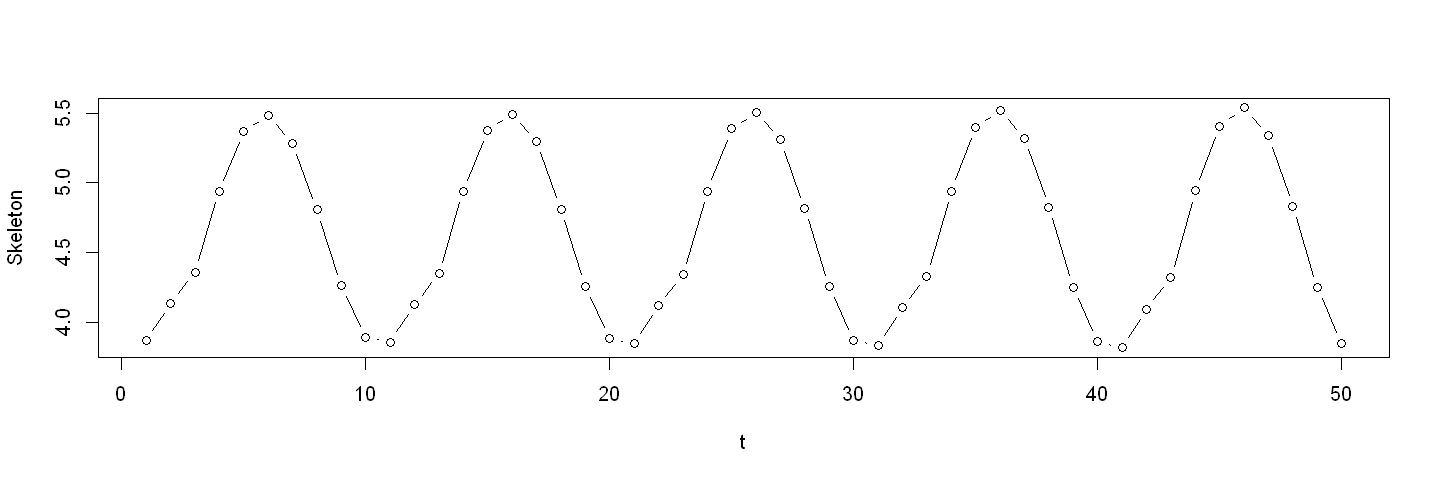

In [5]:
options(repr.plot.width=12, repr.plot.height=4)

tar.skeleton(model.d2, ntransient=500, n=500)

 limit cycle of length  10  and it consists of  4.6805 4.3389 3.9227 3.8223 4.1513 4.4862 4.8269 5.1736 5.5264 5.1587 


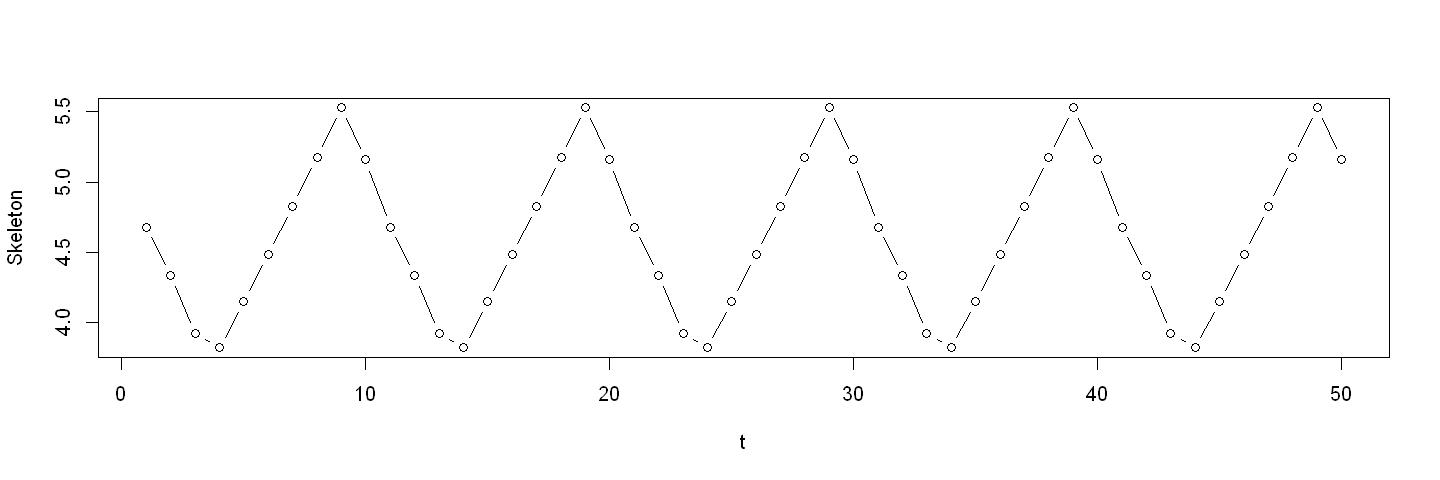

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

tar.skeleton(model.d3)

**Exercise 15.2**. Fit a TAR model to the square-root-transformed relative sunspot data, and examine its goodness of fit. Interpret the fitted TAR model. (The data file is named `spots`.)

**Solution**.

As in Exhibit 15.11, we can search through models with multiple delays based on AIC:

In [7]:
Y = fread('../data/spots.dat')[['spots']]

In [8]:
max.d = 5
max.p = 5

AICM = NULL
for (d in 1:max.d) {
    model.spots = tar(y=sqrt(Y), p1=max.p, p2=max.p, d=d, a=.1, b=.9)
    AICM = rbind(AICM, c(d, model.spots$AIC, signif(model.spots$thd,4), model.spots$p1, model.spots$p2))
}
colnames(AICM) = c('d','Nominal AIC','r','p1','p2')
rownames(AICM) = NULL
AICM

d,Nominal AIC,r,p1,p2
1,149.9,5.882,5,5
2,110.5,6.058,3,5
3,124.6,6.595,2,5
4,126.2,8.044,3,5
5,150.5,8.155,4,5


The model with best AIC has delay 2, and is a SETAR(2, 3, 5) model:

In [9]:
model.spots = tar(y=sqrt(Y), p1=3, p2=5, d=2, a=.1, b=.9, print=T)

time series included in this analysis is:  sqrt(Y) 
SETAR(2, 3 , 5 ) model delay = 2 
estimated threshold =  6.058  from a Minimum AIC  fit with thresholds 
searched from the  12  percentile to the   79  percentile of all data.
The estimated threshold is the  35.7  percentile of
all data.
lower regime: 
Residual Standard Error=0.9061
R-Square=0.9894
F-statistic (df=4, 16)=373.5257
p-value=0

                  Estimate Std.Err t-value Pr(>|t|)
intercept-sqrt(Y)   9.5242  1.2796  7.4432   0.0000
lag1-sqrt(Y)        1.0479  0.1699  6.1679   0.0000
lag2-sqrt(Y)       -1.2022  0.2909 -4.1319   0.0008
lag3-sqrt(Y)       -0.5555  0.2441 -2.2752   0.0370




 (unbiased) RMS 
0.8211 
 with no of data falling in the regime being 
sqrt(Y) 20 


 (max. likelihood) RMS for each series (denominator=sample size in the regime) 
sqrt(Y) 0.6569 


 upper regime: 
Residual Standard Error=0.4627
R-Square=0.9977
F-statistic (df=6, 30)=2149.376
p-value=0

                  Estimate Std.Err t-value Pr(>|t|)


Since the largest delay on the upper regime is not significant ($\hat{\phi}_{2, 5}$ has p-value 0.1437), we refit the model as a SETAR(2, 3, 4):

In [10]:
model.spots = tar(y=sqrt(Y), p1=3, p2=4, d=2, a=.1, b=.9, print=T)

time series included in this analysis is:  sqrt(Y) 
SETAR(2, 3 , 4 ) model delay = 2 
estimated threshold =  6.058  from a Minimum AIC  fit with thresholds 
searched from the  12  percentile to the   82  percentile of all data.
The estimated threshold is the  35.1  percentile of
all data.
lower regime: 
Residual Standard Error=0.9061
R-Square=0.9894
F-statistic (df=4, 16)=373.5257
p-value=0

                  Estimate Std.Err t-value Pr(>|t|)
intercept-sqrt(Y)   9.5242  1.2796  7.4432   0.0000
lag1-sqrt(Y)        1.0479  0.1699  6.1679   0.0000
lag2-sqrt(Y)       -1.2022  0.2909 -4.1319   0.0008
lag3-sqrt(Y)       -0.5555  0.2441 -2.2752   0.0370




 (unbiased) RMS 
0.8211 
 with no of data falling in the regime being 
sqrt(Y) 20 


 (max. likelihood) RMS for each series (denominator=sample size in the regime) 
sqrt(Y) 0.6569 


 upper regime: 
Residual Standard Error=0.4804
R-Square=0.9975
F-statistic (df=5, 32)=2542.773
p-value=0

                  Estimate Std.Err t-value Pr(>|t|)


Next, running diagnostics:

- The standardized residuals show no pattern
- The ACF of the residuals do not display correlation
- The p-values for the Portmanteau test shows all values above 0.05
- The QQ plot looks reasonable, and the Shapiro-Wilk normality test cannot reject normality of the residuals.

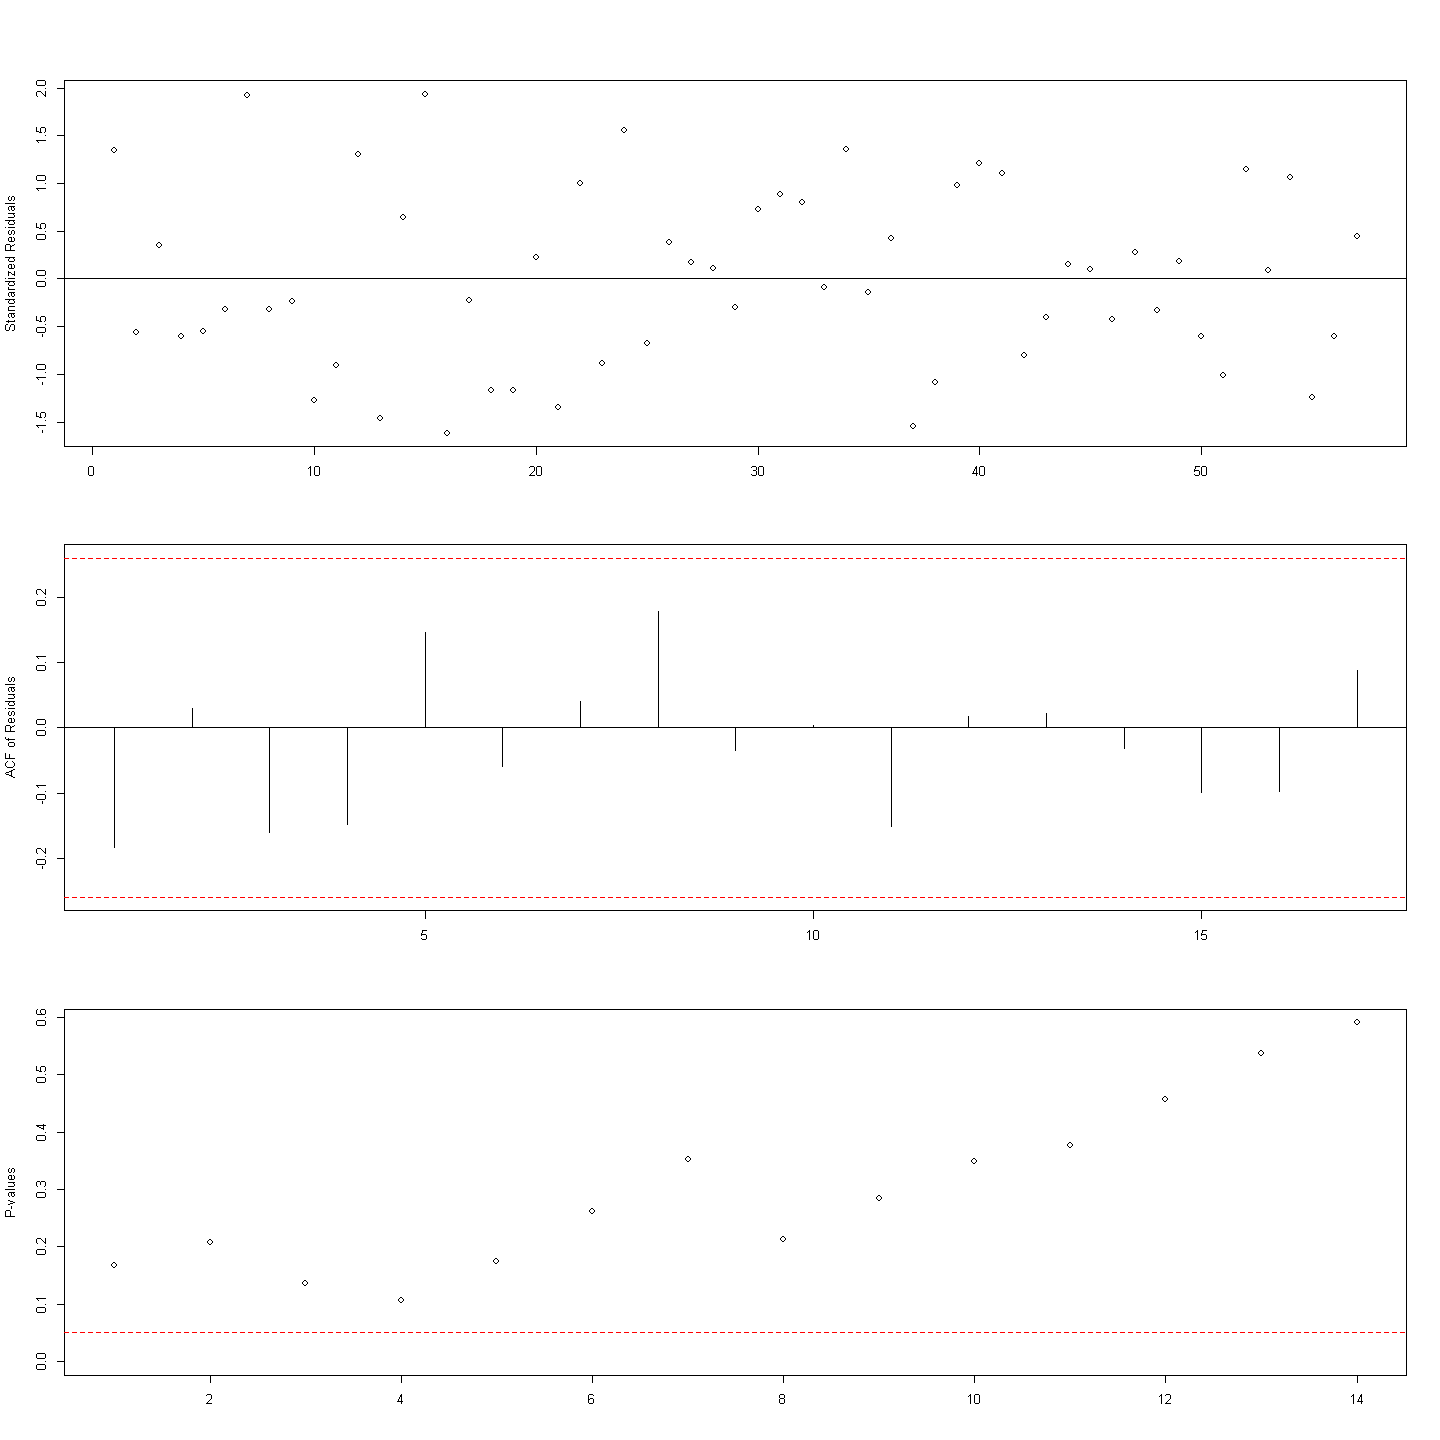

In [11]:
options(repr.plot.width=12, repr.plot.height=12)

tsdiag(model.spots)

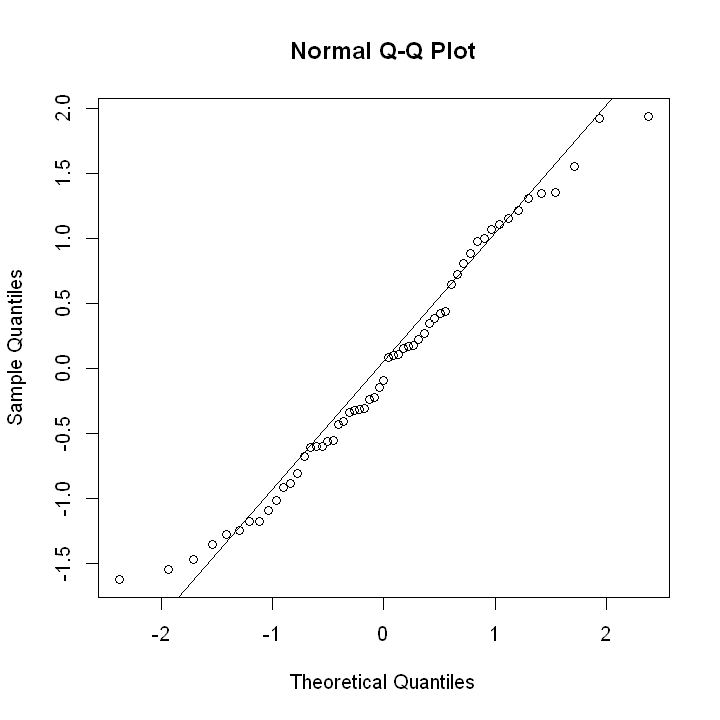

In [12]:
options(repr.plot.width=6, repr.plot.height=6)
qqnorm(model.spots$std.res); qqline(model.spots$std.res)

In [13]:
shapiro.test(model.spots$std.res)


	Shapiro-Wilk normality test

data:  model.spots$std.res
W = 0.97439, p-value = 0.2667


**Exercise 15.3**. Predict the annual relative sunspot numbers for ten years using the fitted model obtained in Exercise 15.2. Draw the prediction intervals and the predicted medians. (The data file is named `spots`.)

**Solution**.

In [14]:
set.seed(0)
model.spots.pred = predict(model.spots, n.ahead=10, n.sim=10000)

In [15]:
Y_pred = model.spots.pred$fit**2
Y_pred_lower = model.spots.pred$pred.interval[1, ]**2
Y_pred_upper = model.spots.pred$pred.interval[2, ]**2

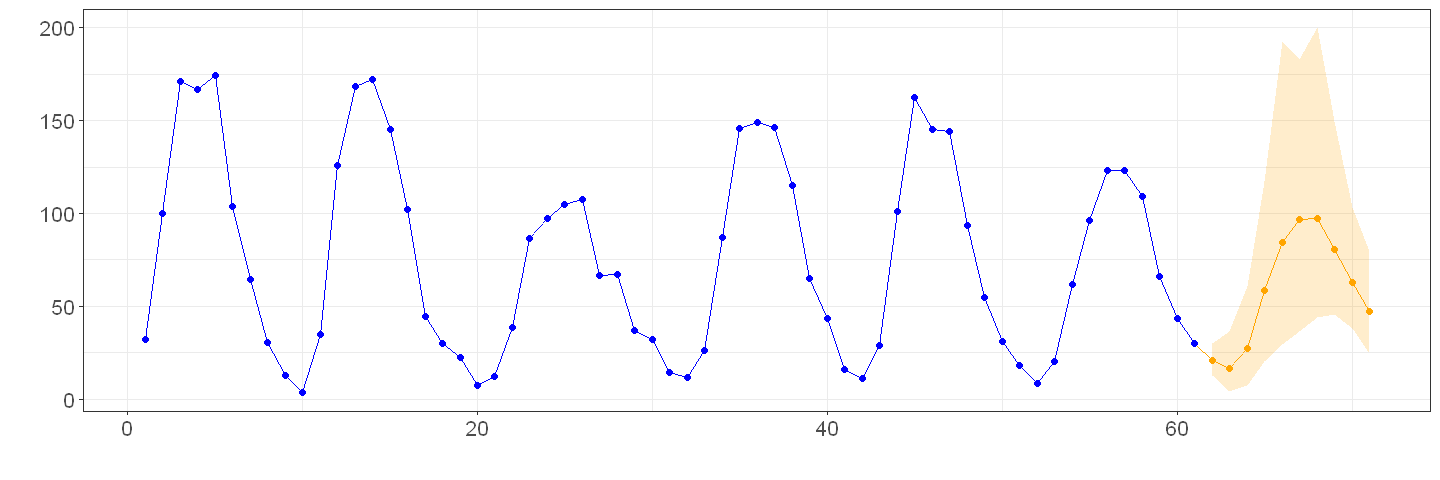

In [16]:
options(repr.plot.width=12, repr.plot.height=4)

m = length(Y_pred)
n = length(Y)

# Prepend last element so line is continuous
plot_data = c(tail(Y, n=1), Y_pred)

ggplot() + 
  geom_line(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_point(aes(x=n:(n+m), y=plot_data), color='orange') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_ribbon(aes(
      x=(n+1):(n+m), 
      ymin=Y_pred_lower, 
      ymax=Y_pred_upper
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**Exercise 15.4**. Examine the long-run behavior of the skeleton of the fitted model for the relative sunspot data. Is the fitted model likely to be stationary? Explain your answer. 

**Solution**.

 limit cycle of length  1  and it consists of  7.0503 


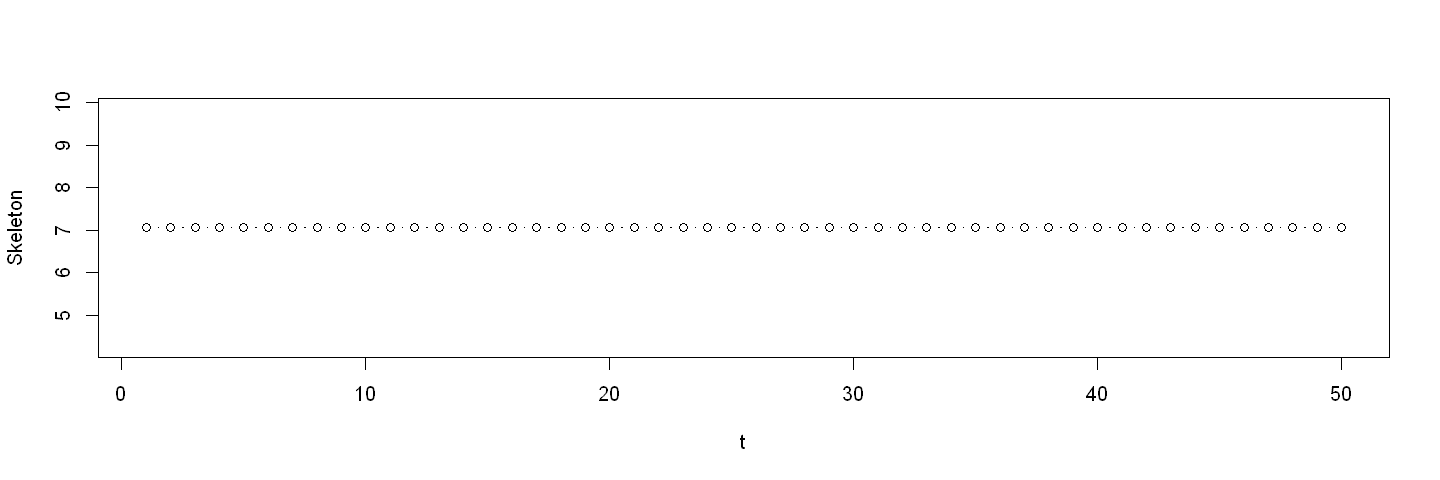

In [17]:
options(repr.plot.width=12, repr.plot.height=4)

tar.skeleton(model.spots)

The fitted model is stationary, and it converges to a constant value.

**Exercise 15.5**. Simulate a series of size 1000 from the TAR model fitted to the relative sunspot data. Compute the spectrum of the simulated realization and compare it with the spectrum of the data. Does the fitted model capture the correlation structure of the data? 

**Solution**.

In [18]:
# Simulate the series
set.seed(0)
Y_sim = tar.sim(n=1000, object=model.spots)$y^2

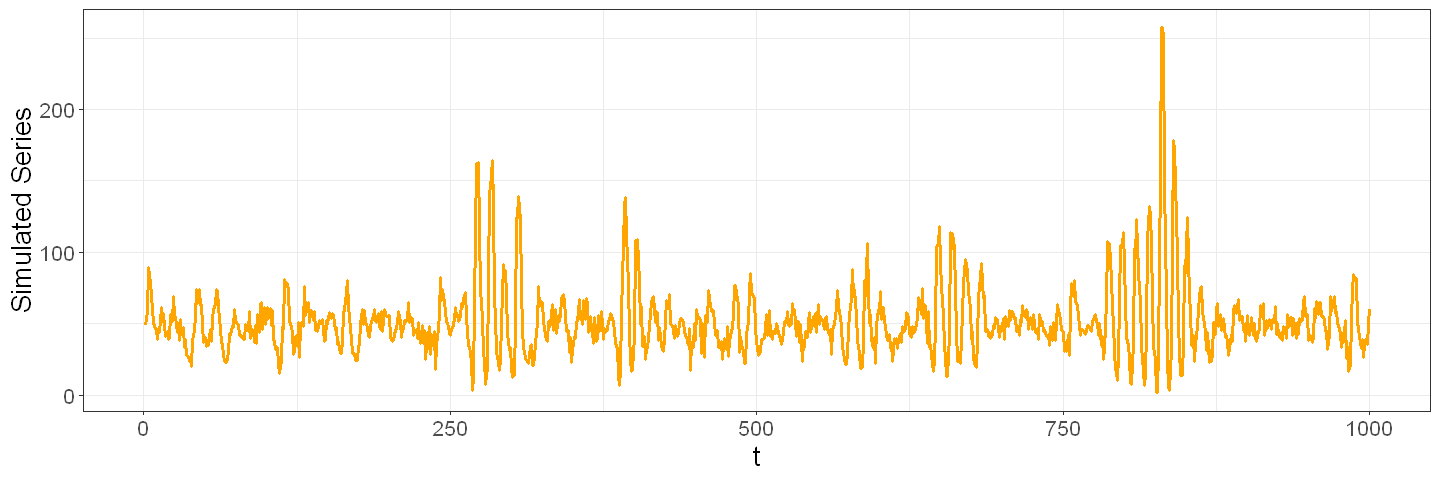

In [19]:
ggplot() +
    geom_line(aes(x=1:1000, y=Y_sim), color='orange', size=1) +
    xlab('t') + ylab('Simulated Series') +
    theme_bw() + theme(text = element_text(size=16))

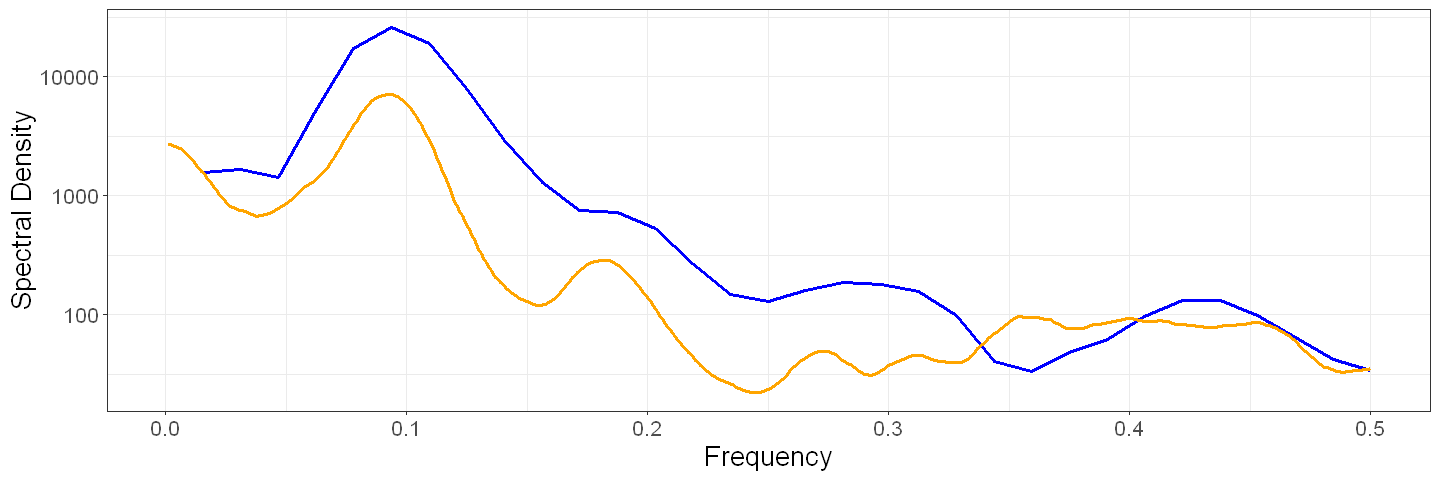

In [20]:
# Compute spectrum of the original data and of the simulation
spec_orig = spec(Y, span=c(3, 3), taper=.1, plot=F);
spec_sim = spec(Y_sim, span=c(21, 21), taper=.1, plot=F);

ggplot() +
    geom_line(aes(x=spec_orig$freq, y=spec_orig$spec), color='blue', size=1) +
    geom_line(aes(x=spec_sim$freq, y=spec_sim$spec), color='orange', size=1) +
    xlab('Frequency') + ylab('Spectral Density') +
    scale_y_continuous(trans="log10") +
    theme_bw() + theme(text = element_text(size=16))

The spectrums seem to be in general agreement.

**Exercise 15.6**. Draw the lagged regression plots for the square-root-transformed hare data. Is there any evidence that the hare data are nonlinear? (The data file is named `hare`.)

**Solution**. Lagged regression plots for lags 2, 3, and 6 appear to indicate that the data are nonlinear.

In [21]:
Y = fread('../data/hare.dat')[['hare']]

In [22]:
# Required for TSA's lagplot
require(locfit)

Loading required package: locfit

locfit 1.5-9.4 	 2020-03-24



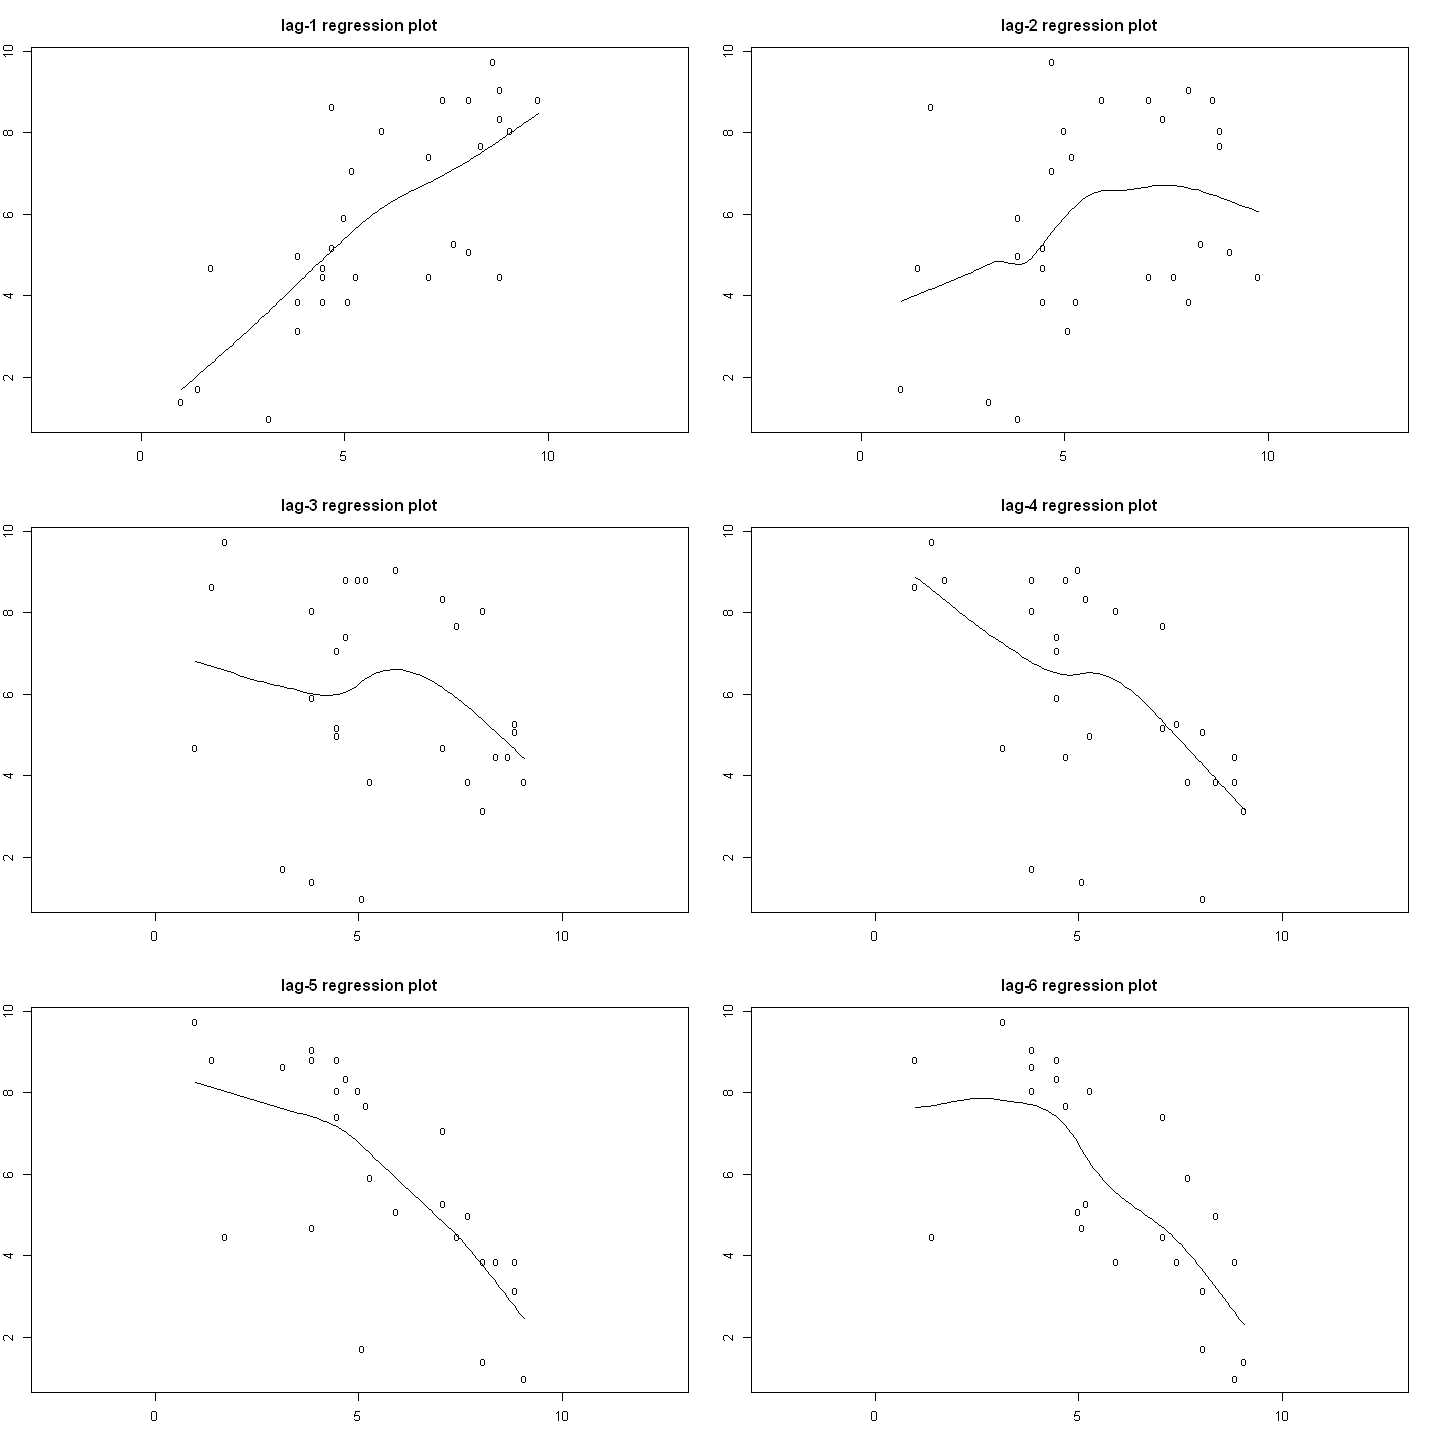

In [23]:
options(repr.plot.width=12, repr.plot.height=12)
TSA::lagplot(sqrt(Y))

**Exercise 15.7**. Carry out formal tests (Keenan’s test, Tsay’s test, and threshold likelihood ratio test) for nonlinearity for the hare data. Is the hare abundance process nonlinear? Explain your answer. (The data file is named `hare`.)

**Solution**.

In [24]:
Keenan.test(sqrt(Y))

$test.stat
[1] 8.083568

$p.value
[1] 0.009207613

$order
[1] 3

In [25]:
Tsay.test(sqrt(Y))

$test.stat
[1] 2.135

$p.value
[1] 0.09923

$order
[1] 3

In [26]:
pvaluem = NULL
for (d in 1:3) {
    res = tlrt(sqrt(Y), p=5, d=d, a=0.25, b=0.75)
    pvaluem = cbind(pvaluem, c(d,res$test.statistic, res$p.value))
}
rownames(pvaluem) = c('d','test statistic','p-value')
round(pvaluem, 3)

d,1.000,2.000,3.000
test statistic,71.558,54.964,16.807
p-value,0.000,0.000,0.083


Keenan's test on the square roots of the hare series shows a p-value of 0.009, pointing to non-linearity.  Tsay's test presents a week result, with p-value a bit under 0.1, not rejecting linearity at 0.05.  Finally, the threshold likelihood test displays p-value under 0.001 for delays 1 and 2.

The tests suggest that the process is nonlinear.

**Exercise 15.8**. Assuming that the hare data are nonlinear, fit a TAR model to the hare data and examine the goodness of fit. (The data file is named `hare`.)

**Solution**.  Let's search through multiple delays, based on AIC:

In [27]:
max.d = 5
max.p = 5

AICM = NULL
for (d in 1:max.d) {
    model.spots = tar(y=sqrt(Y), p1=max.p, p2=max.p, d=d, a=.1, b=.9)
    AICM = rbind(AICM, c(d, model.spots$AIC, signif(model.spots$thd,4), model.spots$p1, model.spots$p2))
}
colnames(AICM) = c('d','Nominal AIC','r','p1','p2')
rownames(AICM) = NULL
AICM

d,Nominal AIC,r,p1,p2
1,73.34,5.916,4,5
2,76.22,5.292,4,4
3,85.00,5.099,5,5
4,80.85,5.099,5,5
5,71.47,5.000,5,3


Next, let's fit a SETAR(2, 5, 3) model with delay $d = 5$:

In [28]:
model.hare = tar(y=sqrt(Y), p1=5, p2=3, d=5, a=.1, b=.9, print=T)

time series included in this analysis is:  sqrt(Y) 
SETAR(2, 5 , 3 ) model delay = 5 
estimated threshold =  5  from a Minimum AIC  fit with thresholds 
searched from the  42  percentile to the   69  percentile of all data.
The estimated threshold is the  46.2  percentile of
all data.
lower regime: 
Residual Standard Error=0.5612
R-Square=0.9976
F-statistic (df=6, 6)=413.3832
p-value=0

                  Estimate Std.Err t-value Pr(>|t|)
intercept-sqrt(Y)   0.8673  0.9600  0.9035   0.4011
lag1-sqrt(Y)        1.0497  0.1763  5.9544   0.0010
lag2-sqrt(Y)        0.1153  0.2674  0.4314   0.6812
lag3-sqrt(Y)       -0.7305  0.2514 -2.9059   0.0271
lag4-sqrt(Y)       -0.5737  0.3358 -1.7088   0.1384
lag5-sqrt(Y)        1.2025  0.2632  4.5691   0.0038




 (unbiased) RMS 
0.3149 
 with no of data falling in the regime being 
sqrt(Y) 12 


 (max. likelihood) RMS for each series (denominator=sample size in the regime) 
sqrt(Y) 0.1575 


 upper regime: 
Residual Standard Error=1.0964
R-Square=0.9

Since the two largest delays on the upper regime are not significant ($\hat{\phi}_{2, 3}$ has p-value 0.181 and $\hat{\phi}_{2, 2}$ has p-value 0.974), we refit the model as a SETAR(2, 5, 1):

In [29]:
model.hare = tar(y=sqrt(Y), p1=5, p2=1, d=5, a=.1, b=.9, print=T)

time series included in this analysis is:  sqrt(Y) 
SETAR(2, 5 , 1 ) model delay = 5 
estimated threshold =  5  from a Minimum AIC  fit with thresholds 
searched from the  42  percentile to the   77  percentile of all data.
The estimated threshold is the  46.2  percentile of
all data.
lower regime: 
Residual Standard Error=0.5612
R-Square=0.9976
F-statistic (df=6, 6)=413.3832
p-value=0

                  Estimate Std.Err t-value Pr(>|t|)
intercept-sqrt(Y)   0.8673  0.9600  0.9035   0.4011
lag1-sqrt(Y)        1.0497  0.1763  5.9544   0.0010
lag2-sqrt(Y)        0.1153  0.2674  0.4314   0.6812
lag3-sqrt(Y)       -0.7305  0.2514 -2.9059   0.0271
lag4-sqrt(Y)       -0.5737  0.3358 -1.7088   0.1384
lag5-sqrt(Y)        1.2025  0.2632  4.5691   0.0038




 (unbiased) RMS 
0.3149 
 with no of data falling in the regime being 
sqrt(Y) 12 


 (max. likelihood) RMS for each series (denominator=sample size in the regime) 
sqrt(Y) 0.1575 


 upper regime: 
Residual Standard Error=1.2826
R-Square=0.9

Next, running diagnostics:

- The standardized residuals show no obvious pattern
- The ACF of the residuals do not display correlation
- The p-values for the Portmanteau test shows all values above 0.05
- The Shapiro-Wilk normality test cannot reject normality of the residuals.

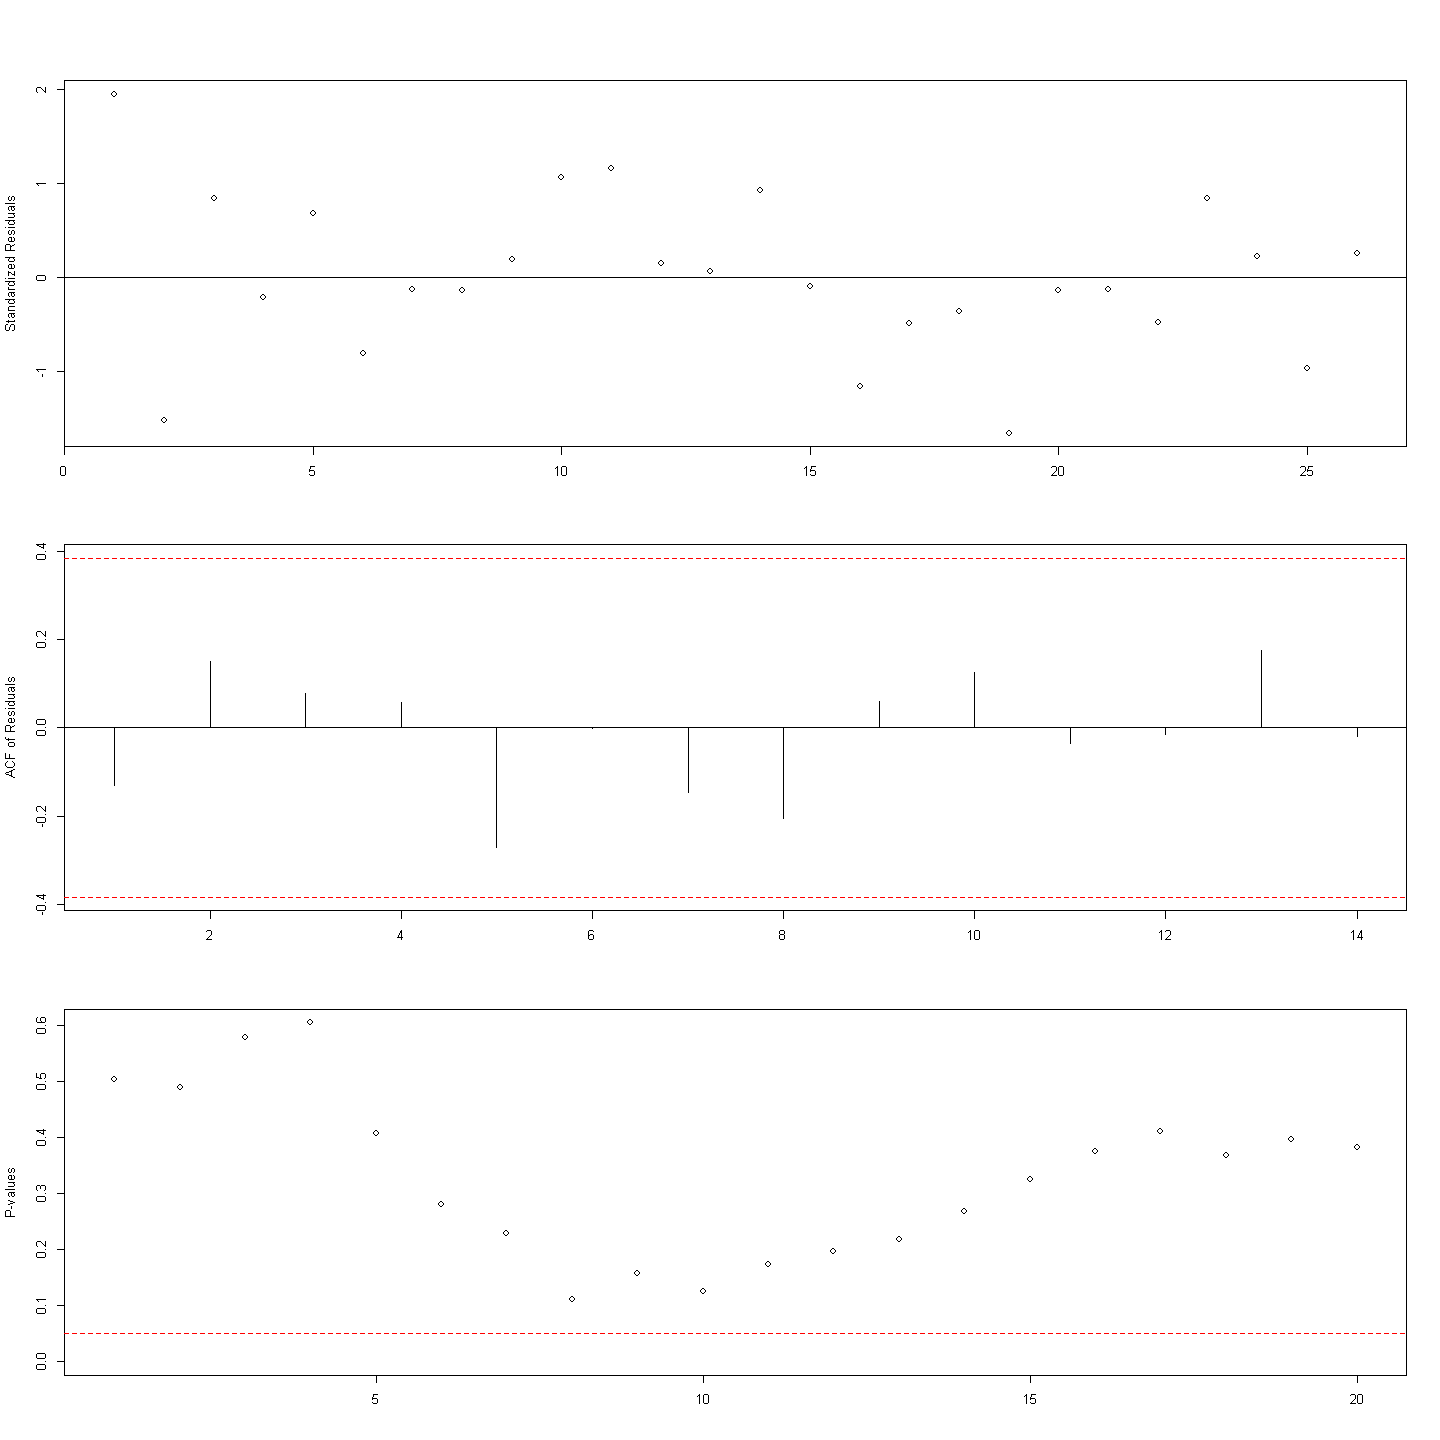

In [30]:
options(repr.plot.width=12, repr.plot.height=12)

tsdiag(model.hare, gof.lag=20)

In [31]:
shapiro.test(model.hare$std.res)


	Shapiro-Wilk normality test

data:  model.hare$std.res
W = 0.97873, p-value = 0.8459


**Exercise 15.9**. This exercise assumes that the reader is familiar with Markov chain theory. Consider a simple TAR model that is piecewise constant: 

$$
Y_t = \begin{cases}
\phi_{1,0} + \sigma_1 e_t &\text{if } Y_{t-1} \leq r\\
\phi_{2,0} + \sigma_2 e_t &\text{if } Y_{t-1} > r
\end{cases}
$$

where $\{e_t\}$ are independent standard normal random variables. Let $R_t = 1$ if $Y_t \leq r$ and 2 otherwise, which is a Markov chain.

**(a)** Find the transition probability matrix of $R_t$ and its stationary distribution.

**(b)** Derive the stationary distribution of $\{Y_t\}$.

**(c)** Find the lag 1 autocovariance of the TAR process. 

**Solution**.

**(a)** We have:

$$ p_{11} = \text{Pr}\left[ Y_t \leq r | Y_{t-1} \leq r \right] = \text{Pr}\left[ \phi_{1, 0} + \sigma_1 e_t \leq r \right] = \Phi\left( \frac{r - \phi_{1, 0} }{\sigma_1} \right) $$

and $$ p_{12} = 1 - p_{11} = 1 - \Phi\left( \frac{r - \phi_{1, 0} }{\sigma_1} \right) $$

where $\Phi$ is the cumulative distribution function of the standard normal.

Similarly,

$$ p_{21} = \text{Pr}\left[ Y_t \leq r | Y_{t-1} > r \right] = \text{Pr}\left[ \phi_{2, 0} + \sigma_2 e_t \leq r \right] = \Phi\left( \frac{r - \phi_{2, 0} }{\sigma_2} \right) $$

and

$$ p_{22} = 1 - p_{21} = 1 - \Phi\left( \frac{r - \phi_{2, 0} }{\sigma_2} \right) $$

Therefore, the probability transition matrix is

$$
\begin{bmatrix}
p_{11} & p_{12} \\
p_{21} & p_{22}
\end{bmatrix} = \begin{bmatrix}
\Phi\left( \frac{r - \phi_{1, 0} }{\sigma_1} \right) & 1 - \Phi\left( \frac{r - \phi_{1, 0} }{\sigma_1} \right) \\
\Phi\left( \frac{r - \phi_{2, 0} }{\sigma_2} \right) & 1 - \Phi\left( \frac{r - \phi_{2, 0} }{\sigma_2} \right)
\end{bmatrix}
$$

If the stationary distribution is $\begin{bmatrix} \pi_1 \pi_2 \end{bmatrix}^T$, then the stationary distribution isn't affected by the transition operation, that is,

$$ \begin{bmatrix} \pi_1 & \pi_2 \end{bmatrix} \cdot \begin{bmatrix}
p_{11} & p_{12} \\
p_{21} & p_{22}
\end{bmatrix} = \begin{bmatrix} \pi_1 & \pi_2 \end{bmatrix} $$

Given that $\pi_1 + \pi_2 = 1$, we can solve to obtain the stationary distribution,

$$
\begin{bmatrix} \pi_1 \\ \pi_2 \end{bmatrix} = 
\begin{bmatrix} \frac{p_{21}}{p_{21} + p_{12}} \\ \frac{p_{12}}{p_{21} + p_{12}} \end{bmatrix}
$$

**(b)**  Let $F$ be the stationary distribution of $\{Y_t\}$.  Then $Y_{t+1}$ follows the same distribution as $Y_t$, so

$$ 
\text{Pr}(Y_{t+1} \leq y) = \text{Pr}(Y_t \leq r) \text{Pr}(Y_{t+1} \leq y | Y_t \leq r) 
 + \text{Pr}(Y_t > r) \text{Pr}(Y_{t+1} \leq y | Y_t > r)
$$

and, using $\text{Pr}(Y_{t+1} \leq y) = \text{Pr}(Y_t \leq y) = F(y)$, we get

$$
F(y) = F(r) \Phi\left(\frac{y - \phi_{1, 0}}{\sigma_1}\right) + (1 - F(r)) \Phi\left( \frac{y - \phi_{2, 0}}{\sigma_2}\right)
$$

For the case where $y = r$, we can solve for $F(r)$, obtaining:

$$ F(r) = \frac{ \Phi\left( \frac{r - \phi_{2, 0}}{\sigma_2}\right)}{1 - \Phi\left(\frac{r - \phi_{1, 0}}{\sigma_1}\right) +  \Phi\left( \frac{r - \phi_{2, 0}}{\sigma_2}\right)} $$

Placing it back into the previous equation, we get an expression for $F(y)$ for any $y$,

$$
F(y) = \frac{
    \Phi\left( \frac{r - \phi_{2, 0}}{\sigma_2}\right) \Phi\left(\frac{y - \phi_{1, 0}}{\sigma_1}\right) 
    + \left(1 - \Phi\left( \frac{r - \phi_{1, 0}}{\sigma_1}\right) \right) \Phi\left( \frac{y - \phi_{2, 0}}{\sigma_2}\right)
}{
    1 - \Phi\left(\frac{r - \phi_{1, 0}}{\sigma_1}\right) +  \Phi\left( \frac{r - \phi_{2, 0}}{\sigma_2}\right)
}
$$

**(c)**  We have:

$$
\begin{align}
\text{E}[Y_t] &= \text{E}[Y_t | Y_{t-1} \leq r] \cdot \text{Pr}[Y_{t-1} \leq r] + \text{E}[Y_t | Y_{t-1} > r] \cdot \text{Pr}[Y_{t-1} > r] \\
&= \phi_{1, 0} F(r) + \phi_{2, 0} (1 - F(r))
\end{align}
$$

and, since $Y_t$ and $Y_{t-1}$ are conditionally independent given $Y_{t-1} \leq r$, or given $Y_{t-1} > r$, we have:

$$
\begin{align}
\text{E}[Y_t Y_{t-1}] &= \text{E}[Y_t Y_{t-1} | Y_{t-1} \leq r] \cdot \text{Pr}[Y_{t-1} \leq r] + \text{E}[Y_t Y_{t-1} | Y_{t-1} > r] \cdot \text{Pr}[Y_{t-1} > r] \\
&= \text{E}[Y_t | Y_{t-1} \leq r] \cdot \text{E}[Y_{t-1} | Y_{t-1} \leq r] \cdot \text{Pr}[Y_{t-1} \leq r] +
   \text{E}[Y_t | Y_{t-1} > r] \cdot \text{E}[Y_{t-1} | Y_{t-1} > r] \cdot \text{Pr}[Y_{t-1} > r] \\
&= \phi_{1, 0} \left(\int_{-\infty}^{r} y dF(y) \right) F(r)
  + \phi_{2, 0} \left(\int_r^{\infty} y dF(y) \right) (1 - F(r))
\end{align}
$$

Therefore, the autocovariance is

$$
\begin{align}
\text{Cov}[Y_t, Y_{t-1}] &= \text{E}[Y_t Y_{t-1}] - \text{E}[Y_t] \text{E}[Y_{t-1}] \\
&= \phi_{1, 0} F(r) \left(\int_{-\infty}^{r} y dF(y) \right) + \phi_{2, 0} (1 - F(r)) \left(\int_r^{\infty} y dF(y) \right)
  - \left( \phi_{1, 0} F(r) + \phi_{2, 0} (1 - F(r)) \right)^2
\end{align}
$$